In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('/content/telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [143]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [144]:
df.isnull().sum()

,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


<Axes: xlabel='AccountWeeks'>

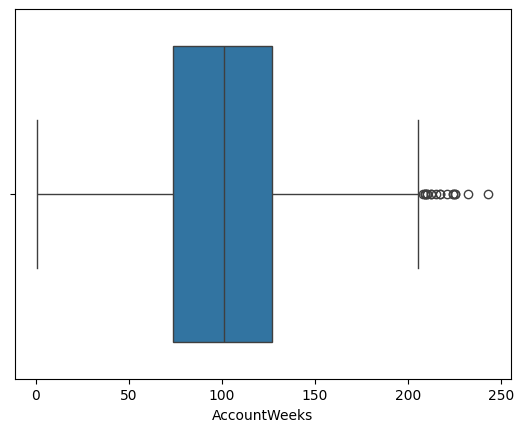

In [145]:
sns.boxplot(x=df['AccountWeeks'])

In [148]:
q1 = df['AccountWeeks'].quantile(0.25)
q3 = df['AccountWeeks'].quantile(0.75)
iqr = q3-q1

In [149]:
q1,q3,iqr

(74.0, 127.0, 53.0)

In [150]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit,upper_limit

(-5.5, 206.5)

<Axes: xlabel='AccountWeeks'>

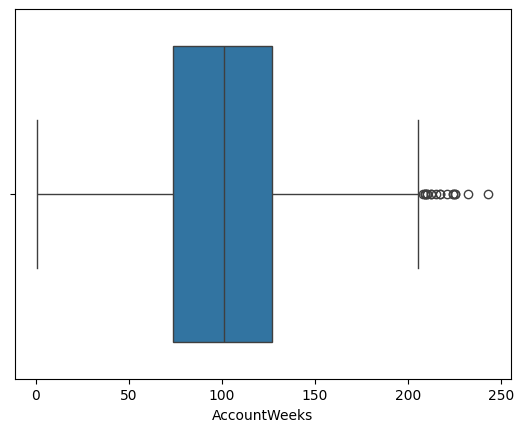

In [151]:
sns.boxplot(x=df['AccountWeeks'])

In [152]:
#find the data
df.loc[(df['AccountWeeks'] > upper_limit) | (df['AccountWeeks'] < lower_limit)]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
197,1,208,1,0,0.33,2,326.5,67,74.3,8.82,10.7
238,0,215,1,0,0.31,0,83.6,148,28.1,6.05,10.7
309,0,209,1,0,0.00,3,227.2,128,61.0,12.92,8.9
416,1,224,0,0,0.26,1,171.5,99,45.6,8.00,5.0
817,0,243,1,0,0.00,2,95.5,92,31.0,8.19,6.6
1045,0,217,1,0,0.00,4,176.4,115,44.0,7.94,9.3
1093,0,210,1,0,0.28,2,104.6,121,33.8,7.48,6.5
1387,0,212,1,0,0.00,1,126.0,96,34.0,7.22,7.6
1408,0,232,1,0,0.14,1,165.6,104,46.4,9.80,11.8
1551,1,225,1,0,0.30,0,165.4,106,55.0,13.69,8.7


In [153]:
#trim the outliers
new_df = df.loc[(df['AccountWeeks'] < upper_limit) & (df['AccountWeeks'] > lower_limit)]
print("before removing outlier:",len(df))
print("After removing outlier:",len(new_df))
print("outliers:",len(df)-len(new_df))

before removing outlier: 3333
After removing outlier: 3315
outliers: 18


<Axes: xlabel='AccountWeeks'>

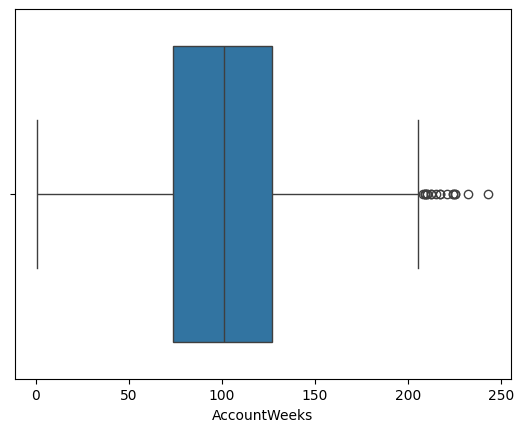

In [154]:
sns.boxplot(x=df['AccountWeeks'])

In [155]:
#capping the outlierd to upper or lower limit
new_df = df.copy()
new_df.loc[(new_df['AccountWeeks'] > upper_limit),'AccountWeeks'] = upper_limit
new_df.loc[(new_df['AccountWeeks'] < lower_limit),'AccountWeeks'] = lower_limit

<ipython-input-155-be12e944cfda>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '206.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[(new_df['AccountWeeks'] > upper_limit),'AccountWeeks'] = upper_limit


<Axes: xlabel='AccountWeeks'>

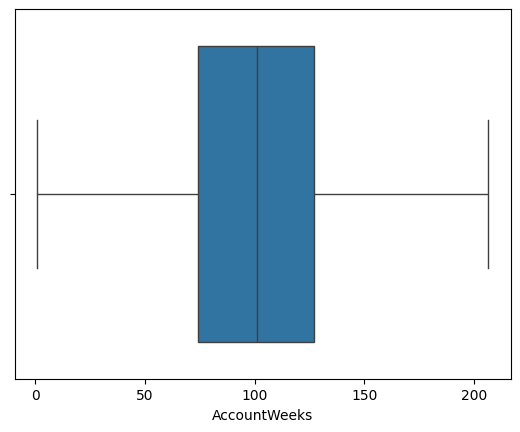

In [156]:
sns.boxplot(x=new_df['AccountWeeks'])

In [157]:
new_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128.0,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107.0,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137.0,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84.0,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75.0,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [158]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   float64
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 286.6 KB


In [159]:


# define the columns to remove outliers from
columns_to_clean = ['ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']


Q1 = new_df[columns_to_clean].quantile(0.25)
Q3 = new_df[columns_to_clean].quantile(0.75)
IQR = Q3 - Q1

# detect outliers (e.g., values outside 1.5*IQR range)
outliers = ((new_df[columns_to_clean] < (Q1 - 1.5 * IQR)) | (new_df[columns_to_clean] > (Q3 + 1.5 * IQR)))

# remove outliers from the original DataFrame
df_clean = new_df[~outliers.any(axis=1)]

print("Original DataFrame shape:", new_df.shape)
print("Cleaned DataFrame shape:", df_clean.shape)

Original DataFrame shape: (3333, 11)
Cleaned DataFrame shape: (2650, 11)


In [160]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2650 entries, 0 to 3330
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            2650 non-null   int64  
 1   AccountWeeks     2650 non-null   float64
 2   ContractRenewal  2650 non-null   int64  
 3   DataPlan         2650 non-null   int64  
 4   DataUsage        2650 non-null   float64
 5   CustServCalls    2650 non-null   int64  
 6   DayMins          2650 non-null   float64
 7   DayCalls         2650 non-null   int64  
 8   MonthlyCharge    2650 non-null   float64
 9   OverageFee       2650 non-null   float64
 10  RoamMins         2650 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 248.4 KB


In [161]:
df_clean = df_clean[['AccountWeeks','ContractRenewal','DataPlan','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins','Churn']]
df_clean.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128.0,1,1,2.70,1,265.1,110,89.0,9.87,10.0,0
1,107.0,1,1,3.70,1,161.6,123,82.0,9.78,13.7,0
2,137.0,1,0,0.00,0,243.4,114,52.0,6.06,12.2,0
11,74.0,1,0,0.34,0,187.7,127,49.4,8.17,9.1,0
12,168.0,1,0,0.00,1,128.8,96,31.0,5.25,11.2,0


<Axes: xlabel='DayMins', ylabel='Count'>

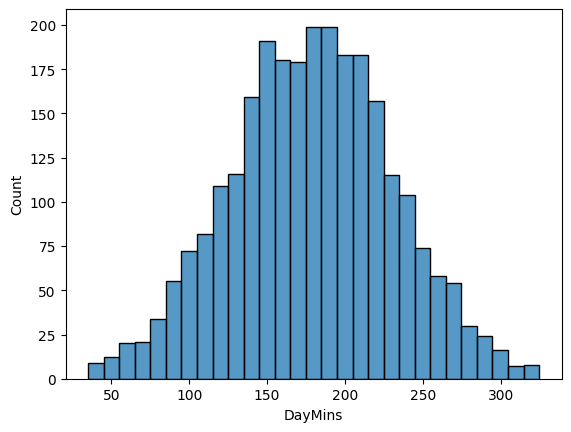

In [162]:
sns.histplot(df_clean['DayMins'])


<Axes: xlabel='Churn', ylabel='DayMins'>

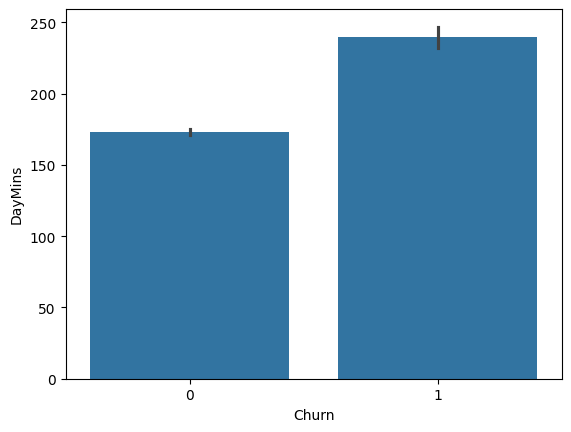

In [163]:
sns.barplot(x=df_clean['Churn'],y=df_clean['DayMins'])

<Axes: xlabel='Churn', ylabel='MonthlyCharge'>

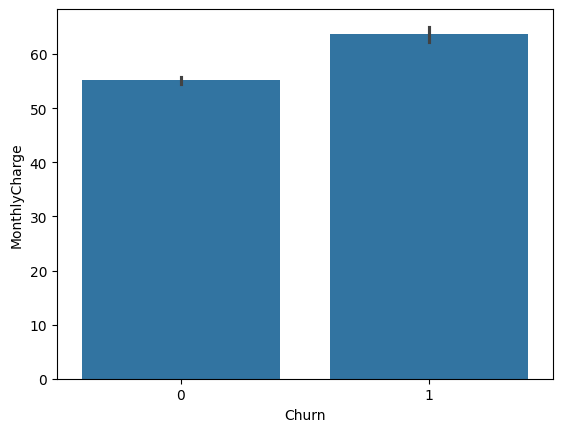

In [164]:
sns.barplot(x=df_clean['Churn'],y=df_clean['MonthlyCharge'])


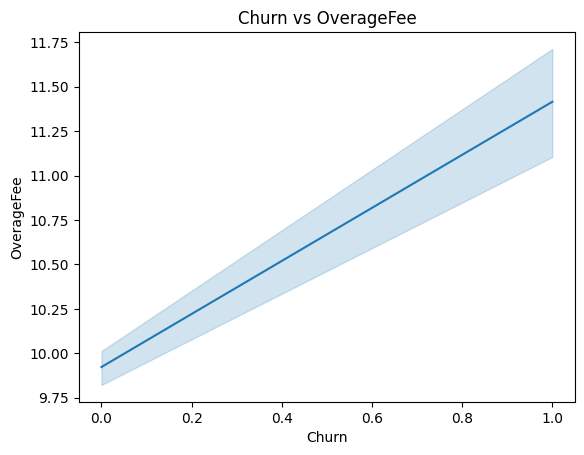

In [165]:
sns.lineplot(x=df_clean['Churn'],y=df_clean['OverageFee'])
plt.title('Churn vs OverageFee')
plt.xlabel('Churn')
plt.ylabel('OverageFee')
plt.show()


In [166]:
df_clean.corr()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
AccountWeeks,1.000000,NaN,0.004183,0.017063,-0.016314,-0.004824,0.063781,0.008176,-0.009100,0.018625,0.012161
ContractRenewal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DataPlan,0.004183,NaN,1.000000,0.953375,-0.023713,-0.010844,-0.023010,0.748842,-0.006710,-0.028860,-0.116975
DataUsage,0.017063,NaN,0.953375,1.000000,-0.027631,-0.019447,-0.018617,0.779983,-0.010556,0.117847,-0.117587
CustServCalls,-0.016314,NaN,-0.023713,-0.027631,1.000000,0.009708,-0.030220,-0.024300,-0.027335,-0.013144,0.000803
DayMins,-0.004824,NaN,-0.010844,-0.019447,0.009708,1.000000,0.012585,0.550035,-0.006931,-0.032713,0.346443
DayCalls,0.063781,NaN,-0.023010,-0.018617,-0.030220,0.012585,1.000000,-0.011785,-0.016186,0.011735,0.033750
MonthlyCharge,0.008176,NaN,0.748842,0.779983,-0.024300,0.550035,-0.011785,1.000000,0.255483,0.068741,0.147412
OverageFee,-0.009100,NaN,-0.006710,-0.010556,-0.027335,-0.006931,-0.016186,0.255483,1.000000,-0.023762,0.165146
RoamMins,0.018625,NaN,-0.028860,0.117847,-0.013144,-0.032713,0.011735,0.068741,-0.023762,1.000000,0.013242


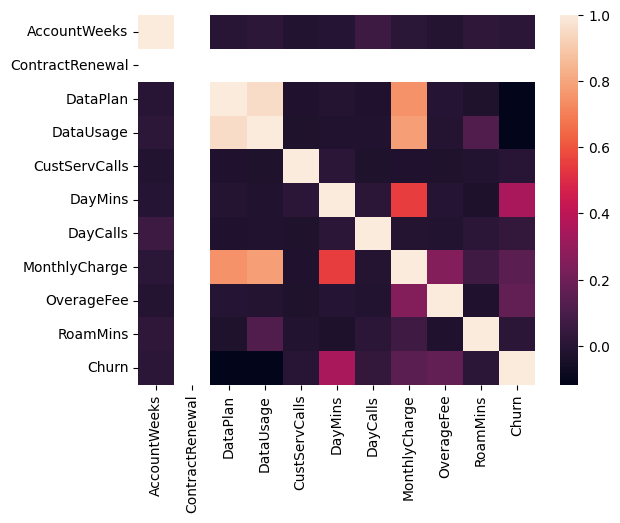

In [167]:
sns.heatmap(df_clean.corr())
sns.figsize=(25,25)


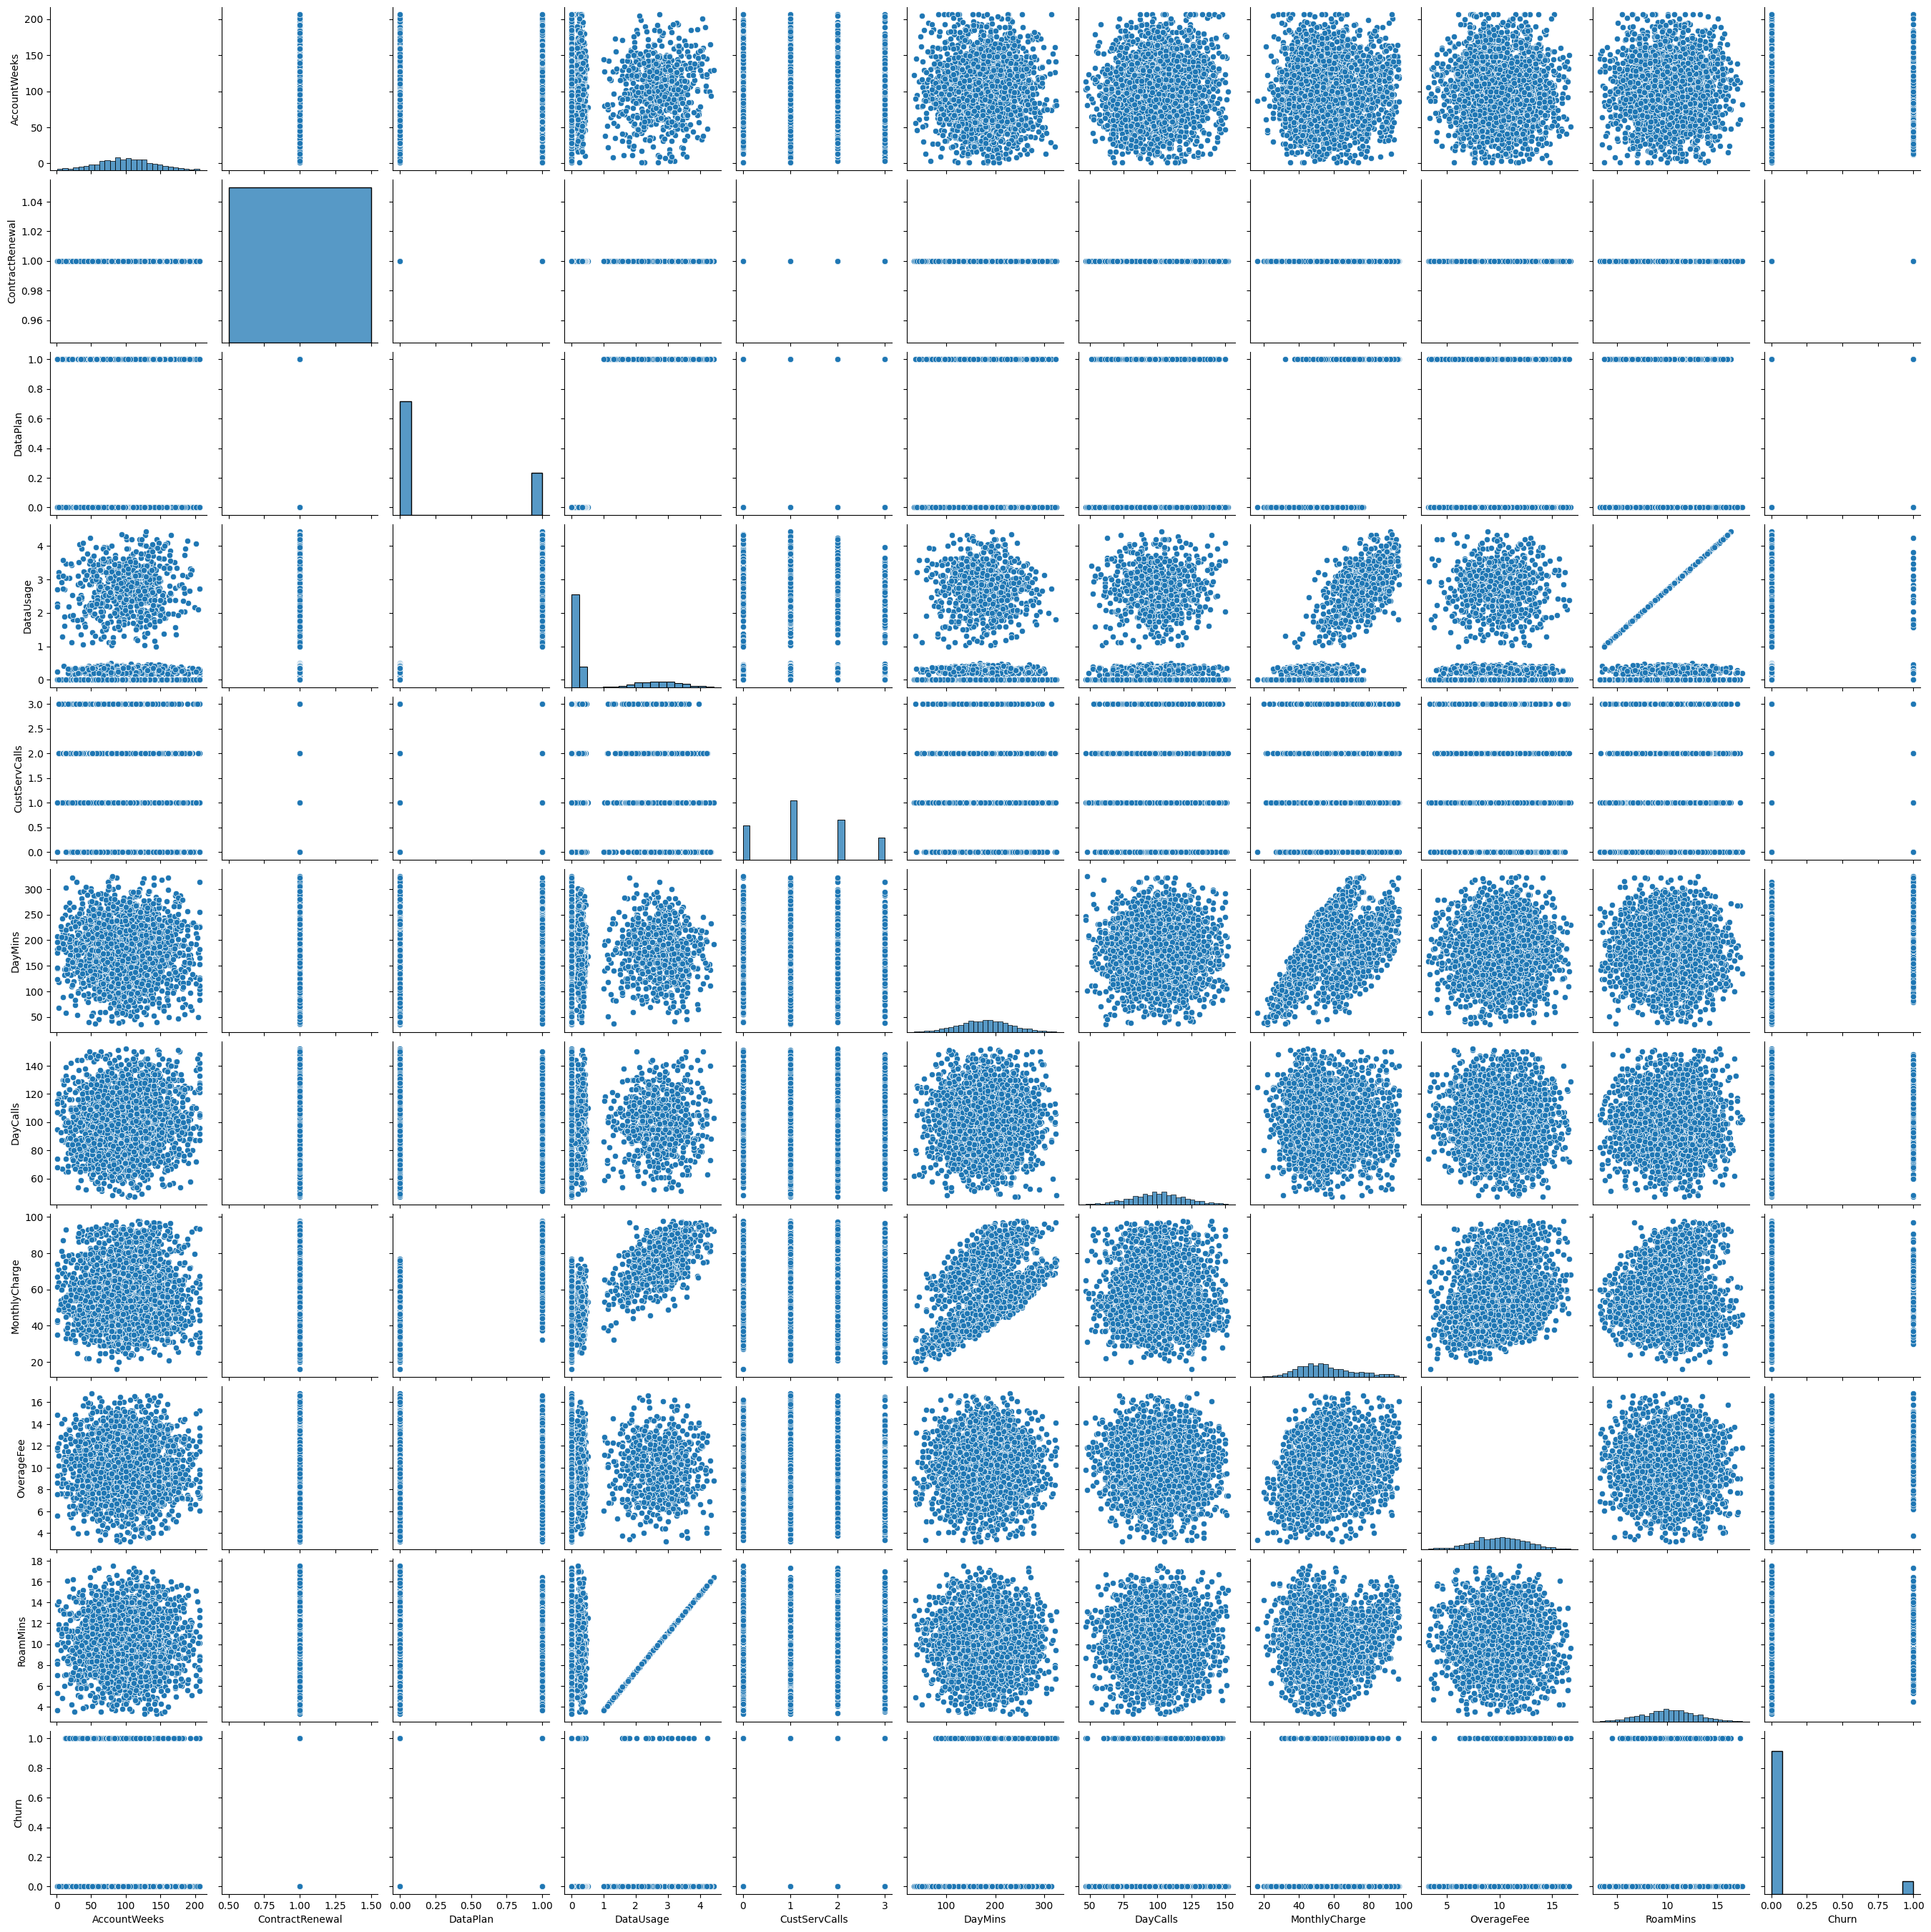

In [168]:
sns.pairplot(df_clean)

In [169]:
df_clean.drop('ContractRenewal', axis=1, inplace=True)
df_clean.head()

,AccountWeeks,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128.0,1,2.70,1,265.1,110,89.0,9.87,10.0,0
1,107.0,1,3.70,1,161.6,123,82.0,9.78,13.7,0
2,137.0,0,0.00,0,243.4,114,52.0,6.06,12.2,0
11,74.0,0,0.34,0,187.7,127,49.4,8.17,9.1,0
12,168.0,0,0.00,1,128.8,96,31.0,5.25,11.2,0


In [170]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [172]:
y_pred = rf.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy1}")

# Print detailed classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9566037735849057
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       488
           1       0.85      0.55      0.67        42

    accuracy                           0.96       530
   macro avg       0.91      0.77      0.82       530
weighted avg       0.95      0.96      0.95       530

[[484   4]
 [ 19  23]]


In [173]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy2}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9245283018867925
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       488
           1       0.67      0.10      0.17        42

    accuracy                           0.92       530
   macro avg       0.80      0.55      0.56       530
weighted avg       0.91      0.92      0.90       530

[[486   2]
 [ 38   4]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


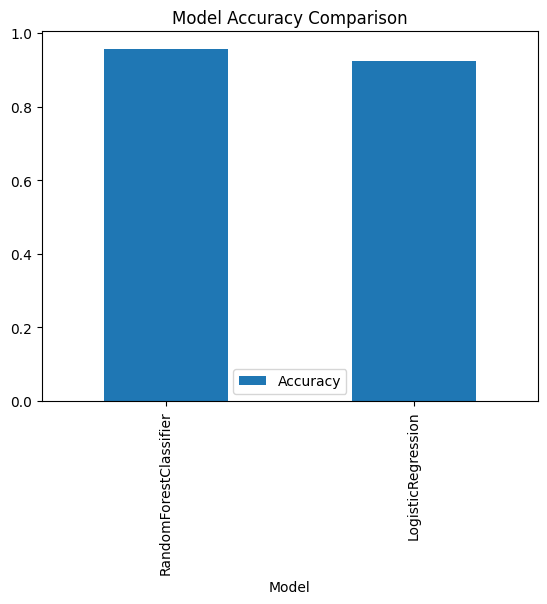

In [174]:
df_clean = pd.DataFrame({
    'Accuracy': [accuracy1, accuracy2],
    'Model': ['RandomForestClassifier', 'LogisticRegression']
})
plt.show(df_clean.plot(x='Model', y='Accuracy', kind='bar', title='Model Accuracy Comparison'))
plt.show()


In [175]:
def get_user_input():
    """Prompts user to enter feature values."""
    AccountWeeks = float(input("Enter Account Weeks: "))
    DataPlan = float(input("Enter Data Plan (0 or 1): "))
    DataUsage = float(input("Enter Data Usage (in GB): "))
    CustServCalls = float(input("Enter number of Customer Service Calls: "))
    DayMins = float(input("Enter Day Minutes (in minutes): "))
    DayCalls = float(input("Enter number of Day Calls: "))
    MonthlyCharge = float(input("Enter Monthly Charge (in USD): "))
    OverageFee = float(input("Enter Overage Fee (in USD): "))
    RoamMins = float(input("Enter Roaming Minutes: "))

    # Combine all inputs into a single feature vector (must be in the same order as your model expects)
    feature_vector = [AccountWeeks, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
    return np.array([feature_vector])  # Convert to 2D array, as the model expects

# Step 3: Use the trained model to predict

input_data = get_user_input()
prediction = rf.predict(input_data)

# Step 4: Display the result
if prediction[0] == 1:
    print("Prediction: The customer will churn.")
else:
    print("Prediction: The customer will not churn.")

Enter Account Weeks: 12.0
Enter Data Plan (0 or 1): 0
Enter Data Usage (in GB): 0.00
Enter number of Customer Service Calls: 1
Enter Day Minutes (in minutes): 249.6
Enter number of Day Calls: 118
Enter Monthly Charge (in USD): 64.0
Enter Overage Fee (in USD): 12.62
Enter Roaming Minutes: 118
Prediction: The customer will churn.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
